# **Predicting Experimental LogS Values**

## **Load Data**

In [192]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_squared_error , r2_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np

In [99]:
df = pd.read_csv("delaney.csv")
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


## **Data Preparation**

### Data Separation as X and Y

In [101]:
y = df["logS"]
y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

In [103]:
X = df.drop("logS", axis=1)
X

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


### Data Splitting

In [105]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2, random_state=100)

## **Model Building**

### *Linear Regression*

#### Training the Model

In [107]:
lr = LinearRegression()

In [109]:
lr.fit(X_train,y_train)

LinearRegression()

### Applying the Model to Make Prediction

In [117]:
y_lr_train_pred = lr.predict(X_train)

In [123]:
y_lr_test_pred = lr.predict(X_test)

### Evaluate Model Perfomance

<p>checking actual values vs predicted values</p>

In [125]:
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [127]:
print("LR MSE (Train):", lr_train_mse)
print("LR R2 (Train):", lr_train_r2)
print("LR MSE (Test):", lr_test_mse)
print("LR R2 (Test):", lr_test_r2)

LR MSE (Train): 1.0075362951093687
LR R2 (Train): 0.7645051774663391
LR MSE (Test): 1.0206953660861036
LR R2 (Test): 0.7891616188563282


In [129]:
lr_results = pd.DataFrame(['Linear Regression', lr_train_mse, lr_train_mse, lr_train_mse, lr_train_mse]).transpose()
lr_results.columns = ["Method", "Training MSE", "Training R2", "Testing MSE", "Testing R2"]
lr_results

,Method,Training MSE,Training R2,Testing MSE,Testing R2
0,Linear Regression,1.007536,1.007536,1.007536,1.007536


## **Random Forest**

### Training the Model

In [131]:
rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

### Applying the model to make a prediction

In [142]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)


### Evaluate Model Perfomance

In [144]:
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [146]:
print("RF MSE (Train):", rf_train_mse)
print("RF R2 (Train):", rf_train_r2)
print("RF MSE (Test):", rf_test_mse)
print("RF R2 (Test):", rf_test_r2)

RF MSE (Train): 1.028227802112806
RF R2 (Train): 0.7596688824431413
RF MSE (Test): 1.407688264904896
RF R2 (Test): 0.7092230211002489


In [148]:
rf_results = pd.DataFrame(["Random Forest", rf_train_mse, rf_train_mse, rf_train_mse, rf_train_mse]).transpose()
rf_results.columns = ["Method", "Training MSE", "Training R2", "Testing MSE", "Testing R2"]
rf_results

,Method,Training MSE,Training R2,Testing MSE,Testing R2
0,Random Forest,1.028228,1.028228,1.028228,1.028228


## **Model Comparison**

In [162]:
df_models = pd.concat([lr_results, rf_results], axis=0)
df_models = df_models.reset_index(drop=True)
df_models

,Method,Training MSE,Training R2,Testing MSE,Testing R2
0,Linear Regression,1.007536,1.007536,1.007536,1.007536
1,Random Forest,1.028228,1.028228,1.028228,1.028228


## **Data Visualization of Predicted Results**

[]

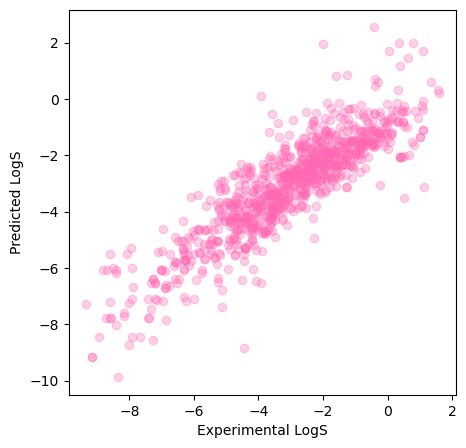

In [190]:
plt.figure(figsize=(5,5))

plt.scatter(x=y_train, y=y_lr_train_pred, alpha = 0.3, c="hotpink")

plt.ylabel("Predicted LogS")
plt.xlabel("Experimental LogS")
plt.plot()

#### Adding a Trendline using numpy

[]

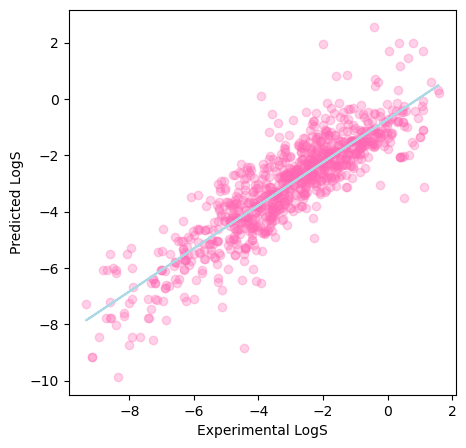

In [203]:

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, alpha = 0.3, c="hotpink")

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)
plt.plot(y_train, p(y_train), c="lightblue")

plt.ylabel("Predicted LogS")
plt.xlabel("Experimental LogS")
plt.plot()